In [ ]:
# Import basic libraries
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# --- FUNCTION TO LOAD DATA --- #
def load_data(tr_path):
    """
    Loads data by iterating through subdirectories for each class.

    Args:
        tr_path (str): Path to the directory containing subdirectories for each class.

    Returns:
        pd.DataFrame: DataFrame containing file paths and corresponding class labels.
    """
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])
    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

##DATA LOADING AND SPLITTING##

In [ ]:
# Load the dataset
tr_df = load_data('<training_data>')

In [ ]:
# Split dataset into train (80%), validation (10%), and test (10%)
train_data, temp_data = train_test_split(tr_df, test_size=0.2, random_state=42, stratify=tr_df['Class'])
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['Class'])

In [ ]:
# Data preprocessing configurations
batch_size = 32
img_size = (128, 128)
_gen = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
# Function to preprocess data for a given dataset (train, validation, test)
def preprocess_data(train_data, val_data, test_data, batch_size, img_size):
    train_gen = _gen.flow_from_dataframe(train_data, x_col='Class Path', y_col='Class',
                                         batch_size=batch_size, target_size=img_size)
    val_gen = ts_gen.flow_from_dataframe(val_data, x_col='Class Path', y_col='Class',
                                         batch_size=batch_size, target_size=img_size)
    test_gen = ts_gen.flow_from_dataframe(test_data, x_col='Class Path', y_col='Class',
                                          batch_size=batch_size, target_size=img_size, shuffle=False)
    return train_gen, val_gen, test_gen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize random predictions from the test set
def visualize_predictions(test_gen, preds, train_gen, num_images=5):
    """
    Visualizes random predictions from the test set.

    Args:
        test_gen (ImageDataGenerator): The test data generator.
        preds (numpy array): Model predictions for the test set.
        train_gen (ImageDataGenerator): The train data generator (for class labels).
        num_images (int): The number of images to display. Default is 9 (3x3 grid).
    """
    # Get the class labels from the train data generator
    labels = list(train_gen.class_indices.keys())

    # Randomly select indices from the test set
    random_indices = np.random.choice(len(test_gen), num_images, replace=False)

    # Create a figure for displaying images
    plt.figure(figsize=(10, 10))

    for i, idx in enumerate(random_indices):
        # Get image and its true label
        image, label = test_gen[idx]

        # Get predicted label from the model's predictions
        pred_label = np.argmax(preds[idx])

        # Get the actual class name and predicted class name
        actual_class = labels[np.argmax(label)]
        class_name = labels[pred_label]

        # Plot the image with actual and predicted class names
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[0])
        plt.title(f"Actual: {actual_class}\nPred: {class_name}", fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Preprocess the data for train, validation, and test sets
train_gen, val_gen, test_gen = preprocess_data(train_data, val_data, test_data, batch_size, img_size)

Found 1048 validated image filenames belonging to 4 classes.
Found 131 validated image filenames belonging to 4 classes.
Found 132 validated image filenames belonging to 4 classes.


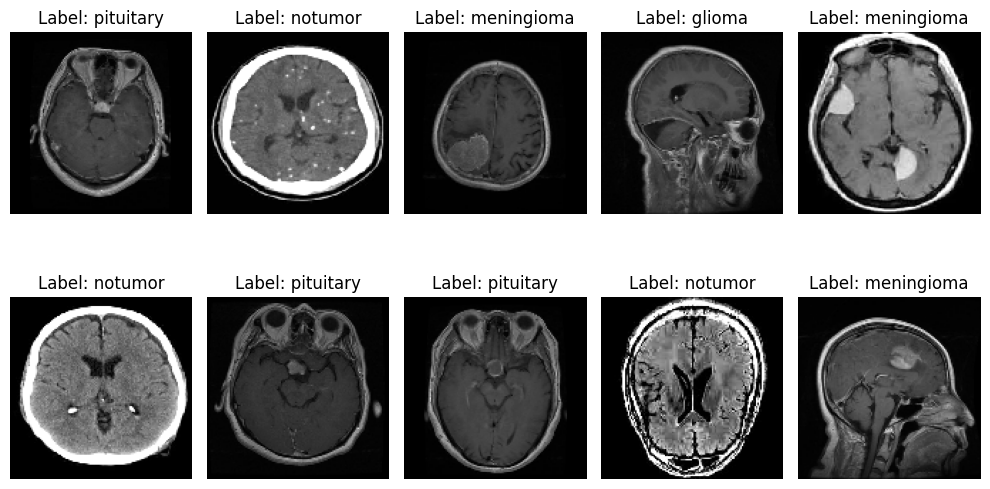

In [ ]:
# Display 5 sample images
sample_images, sample_labels = next(train_gen)
plt.figure(figsize=(10, 6))

for i, (image, label) in enumerate(zip(sample_images[:10], sample_labels[:10])):  # Limit to 10 images
    plt.subplot(2, 5, i + 1)  # Adjust the grid size (2 rows, 5 columns)
    plt.imshow(image)
    actual_class = list(train_gen.class_indices.keys())[np.argmax(label)]
    plt.title(f"Label: {actual_class}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

Starting Fold 1...
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1
33/33 ━━━━━━━━━━━━━━━━━━━━ 624s 18s/step - accuracy: 0.6436 - loss: 1.0003 - val_accuracy: 0.5573 - val_loss: 3.1804
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step


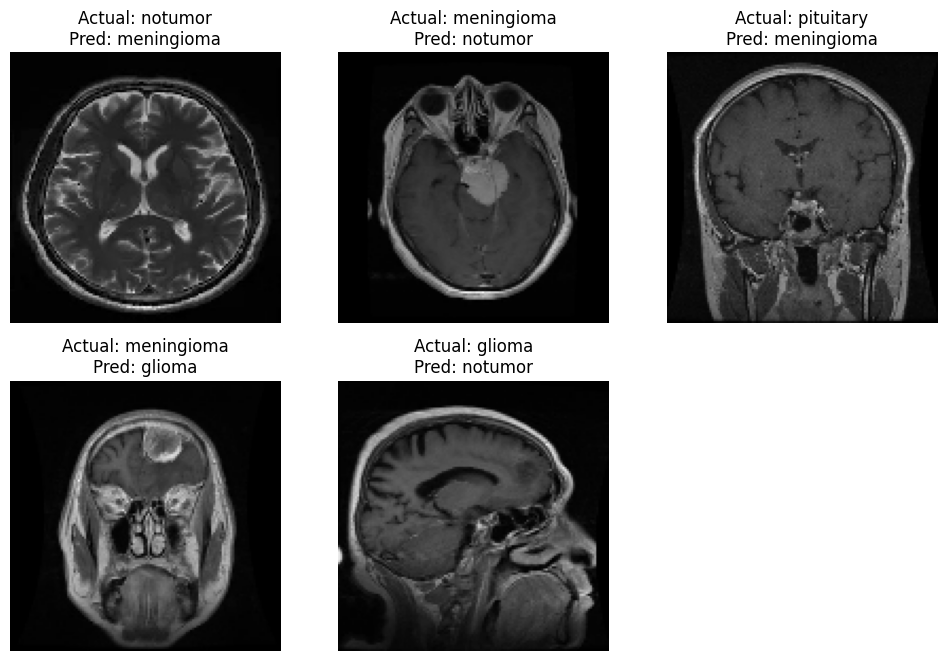

Epoch 1 - RMSE: 1.3114, Accuracy: 0.5758, Precision: 0.6631, Recall: 0.5758, F1 Score: 0.4926


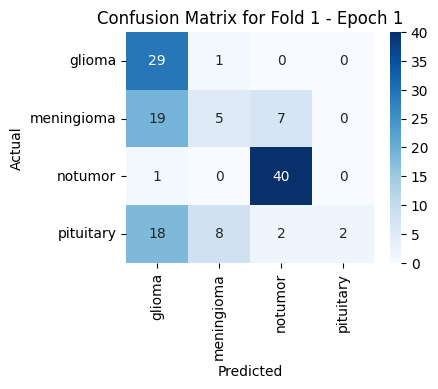

Epoch 2
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.9264 - loss: 0.2338 - val_accuracy: 0.7634 - val_loss: 1.1281
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


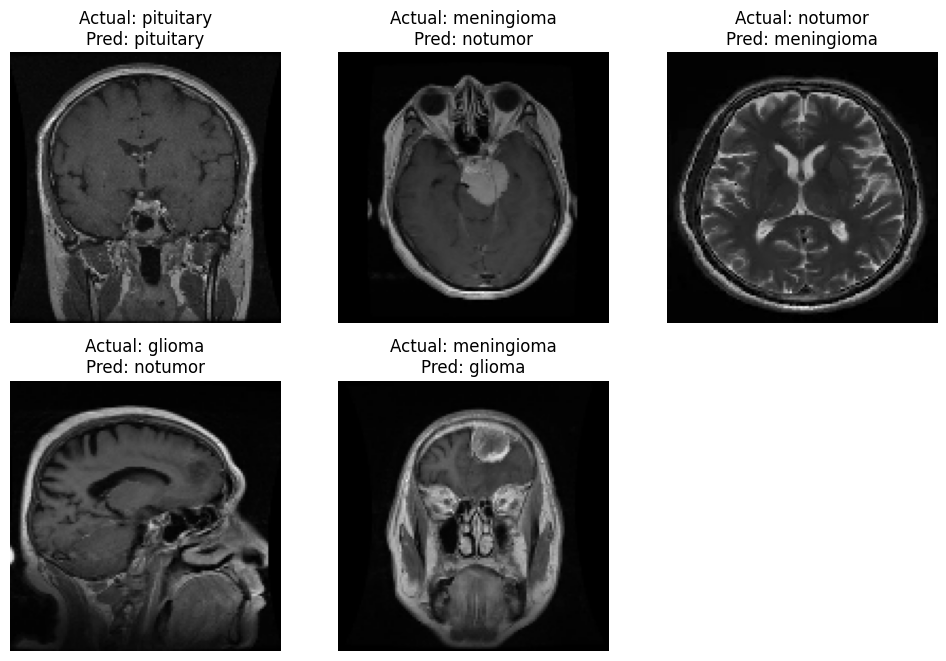

Epoch 2 - RMSE: 0.8118, Accuracy: 0.7803, Precision: 0.8049, Recall: 0.7803, F1 Score: 0.7688


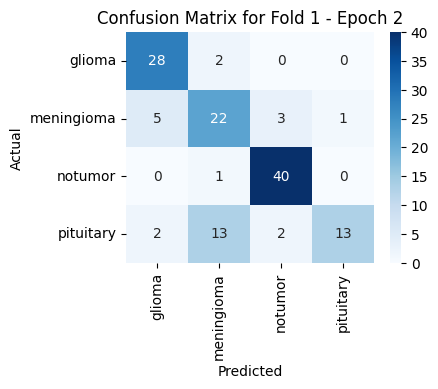

Starting Fold 2...
Epoch 1
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 668ms/step - accuracy: 0.6204 - loss: 0.9301 - val_accuracy: 0.4427 - val_loss: 7.2105
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step


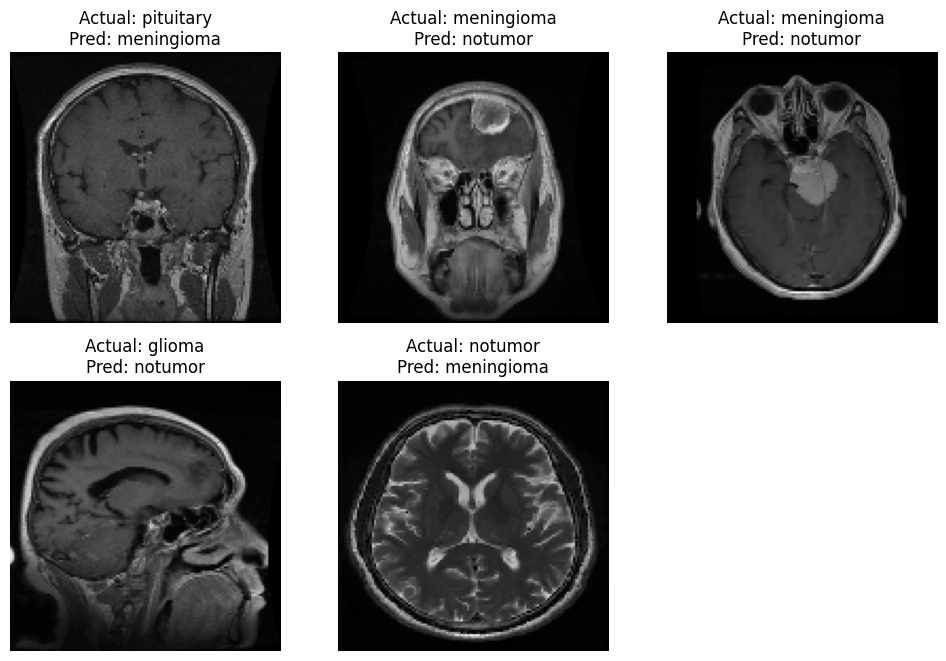

Epoch 1 - RMSE: 1.2703, Accuracy: 0.4773, Precision: 0.2876, Recall: 0.4773, F1 Score: 0.3473


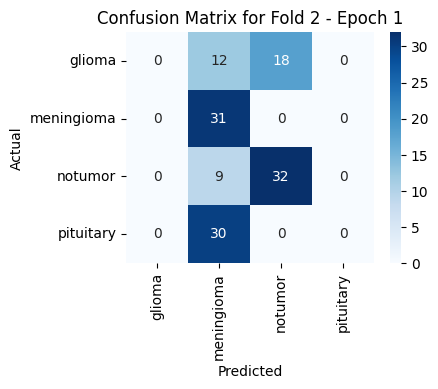

Epoch 2
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.9460 - loss: 0.1816 - val_accuracy: 0.5344 - val_loss: 2.5525
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


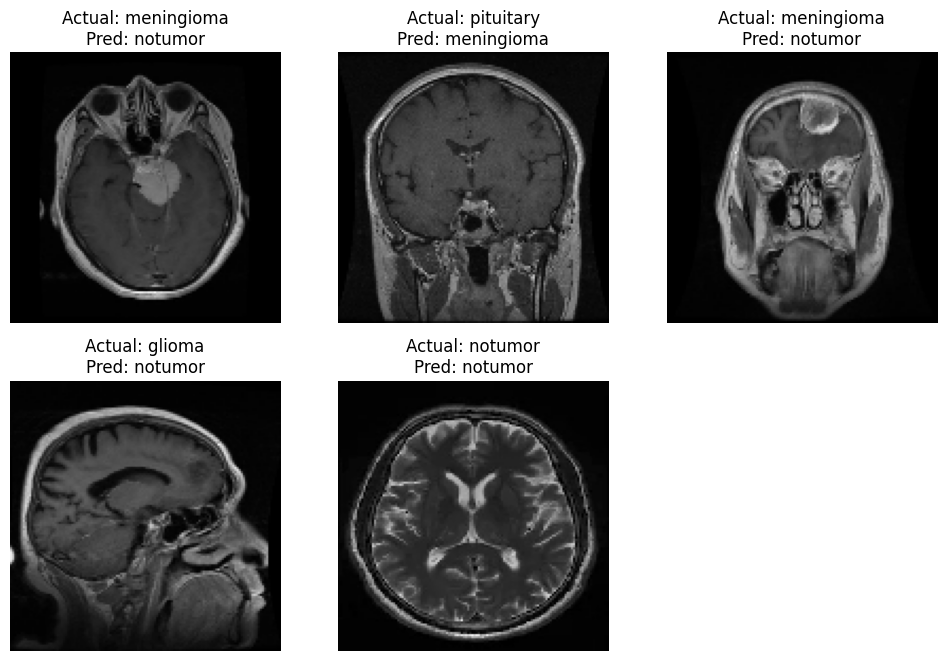

Epoch 2 - RMSE: 0.9886, Accuracy: 0.6364, Precision: 0.8138, Recall: 0.6364, F1 Score: 0.5835


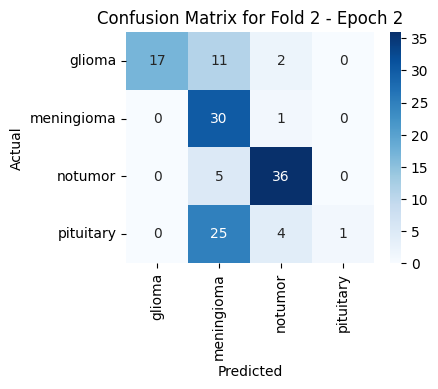

Starting Fold 3...
Epoch 1
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 781ms/step - accuracy: 0.4838 - loss: 1.4043 - val_accuracy: 0.4580 - val_loss: 1.9606
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step


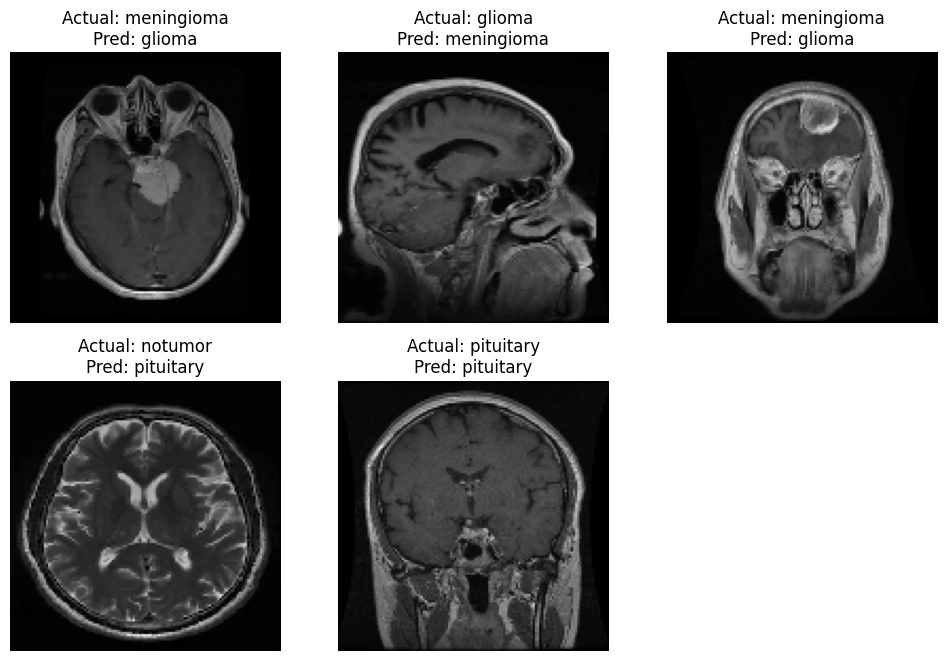

Epoch 1 - RMSE: 1.2733, Accuracy: 0.4545, Precision: 0.5961, Recall: 0.4545, F1 Score: 0.3762


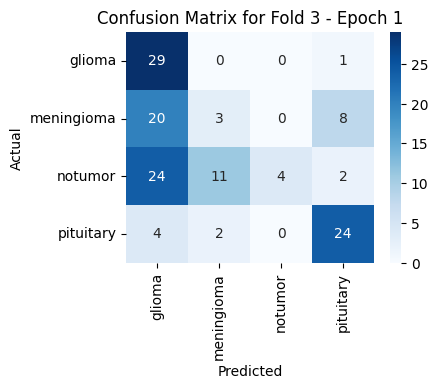

Epoch 2
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - accuracy: 0.7884 - loss: 0.6653 - val_accuracy: 0.4580 - val_loss: 1.7653
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


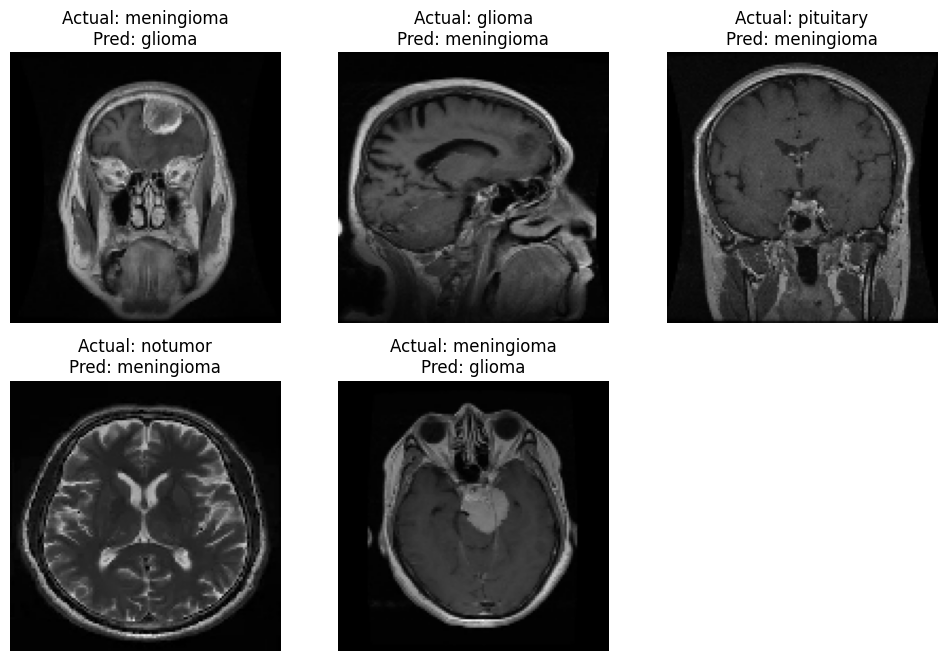

Epoch 2 - RMSE: 1.2371, Accuracy: 0.5152, Precision: 0.6944, Recall: 0.5152, F1 Score: 0.5089


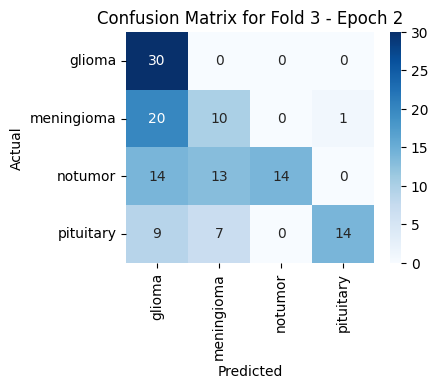

Starting Fold 4...
Epoch 1
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 727ms/step - accuracy: 0.6022 - loss: 1.0350 - val_accuracy: 0.5267 - val_loss: 1.9877
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 608ms/step


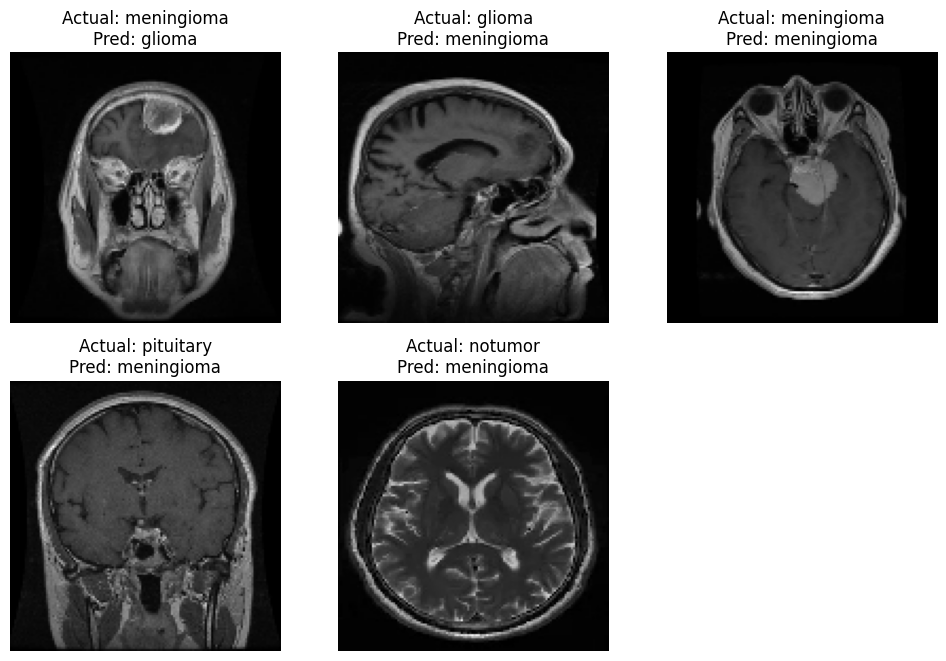

Epoch 1 - RMSE: 0.9455, Accuracy: 0.5606, Precision: 0.8044, Recall: 0.5606, F1 Score: 0.5450


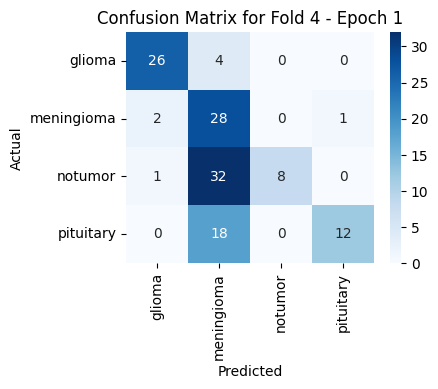

Epoch 2
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.9269 - loss: 0.2290 - val_accuracy: 0.8473 - val_loss: 0.5183
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


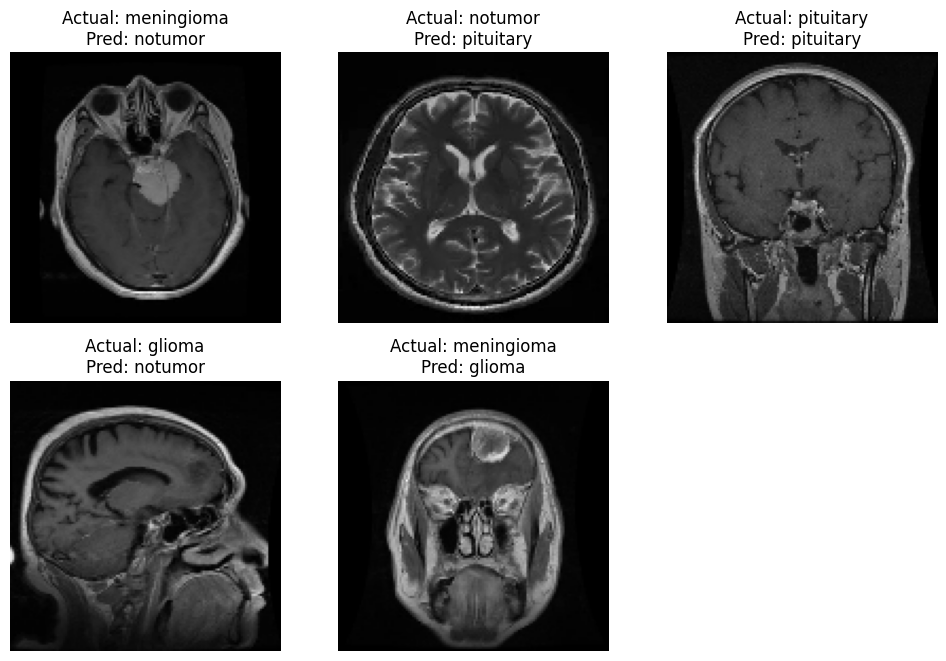

Epoch 2 - RMSE: 0.6629, Accuracy: 0.8485, Precision: 0.8786, Recall: 0.8485, F1 Score: 0.8539


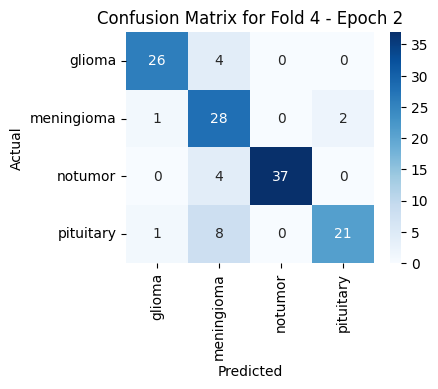

Starting Fold 5...
Epoch 1
33/33 ━━━━━━━━━━━━━━━━━━━━ 55s 725ms/step - accuracy: 0.5024 - loss: 1.3377 - val_accuracy: 0.5191 - val_loss: 1.4532
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 859ms/step


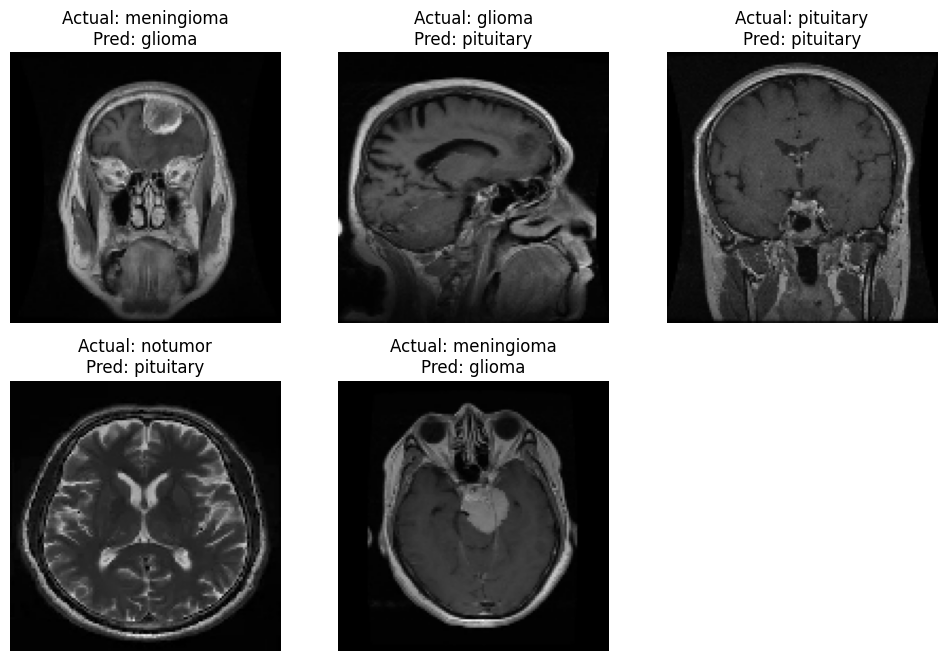

Epoch 1 - RMSE: 1.1078, Accuracy: 0.5455, Precision: 0.7683, Recall: 0.5455, F1 Score: 0.4913


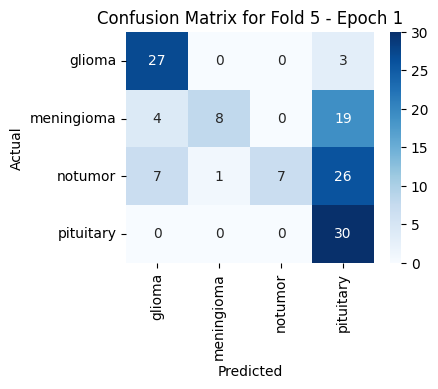

Epoch 2
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.8421 - loss: 0.4534 - val_accuracy: 0.7023 - val_loss: 1.1133
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


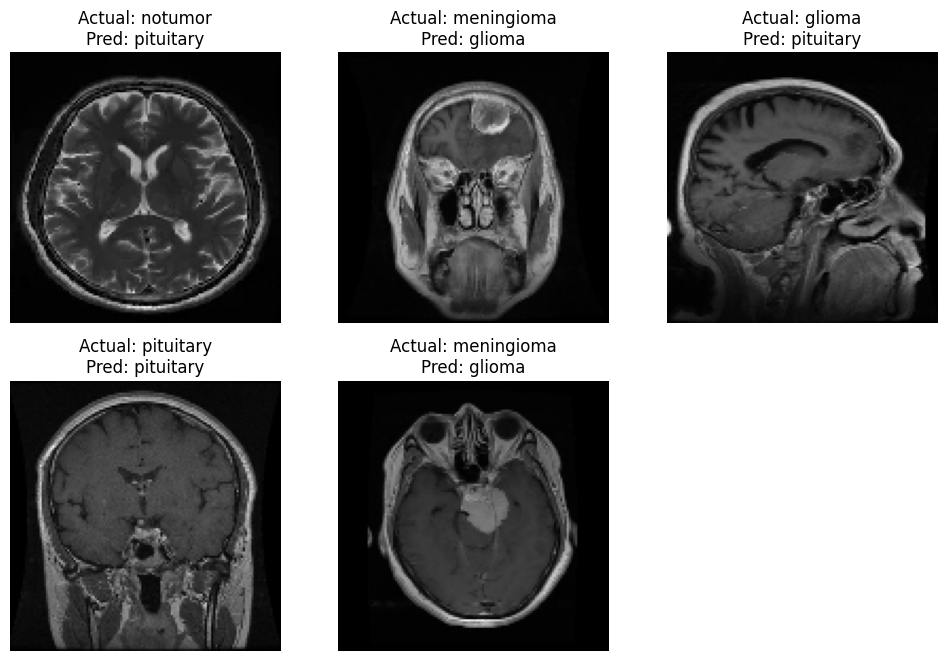

Epoch 2 - RMSE: 0.9045, Accuracy: 0.6894, Precision: 0.8214, Recall: 0.6894, F1 Score: 0.6810


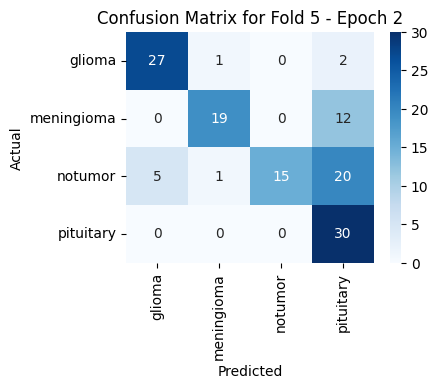

In [ ]:
# K-fold cross-validation with epochs nested inside
results = []
total_epochs = 0  # Variable to store the total number of epochs across all folds

for i in range(5):  # Loop through 5 folds (adjust the range to include more folds if needed)
    print(f"Starting Fold {i + 1}...")

    # Build the model (rebuild for each fold to reset weights)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=(128, 128, 3), pooling='max')
    model = Sequential([
        base_model,
        Flatten(),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')  # Assuming 4 classes
    ])
    model.compile(optimizer=Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model for 2 epochs for this fold
    for epoch in range(2):  # Loop through epochs
        print(f"Epoch {epoch + 1}")

        # Train the model
        model.fit(train_gen, epochs=1, validation_data=val_gen, shuffle=False)  # Use val_gen for validation

        # Evaluate the model on test data
        preds = model.predict(test_gen)
        y_pred = np.argmax(preds, axis=1)
        y_true = test_gen.classes

        visualize_predictions(test_gen, preds, train_gen, num_images=5)

        # Compute metrics
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        # Store results
        fold_results = {
            'Fold': i + 1,
            'Epoch': epoch + 1,
            'RMSE': rmse,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
        results.append(fold_results)

        print(f"Epoch {epoch + 1} - RMSE: {rmse:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Confusion Matrix for the current fold
        cm = confusion_matrix(y_true, y_pred)
        labels = list(train_gen.class_indices.keys())
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.title(f"Confusion Matrix for Fold {i + 1} - Epoch {epoch + 1}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    total_epochs += 2

In [ ]:
# Combine all fold results across epochs into a single DataFrame
all_results_df = pd.DataFrame(results)

In [ ]:
# Display the final cross-validation results for all epochs
print("\nCross-validation Results Across All Folds and Epochs:")
print(all_results_df)


Cross-validation Results Across All Folds and Epochs:
   Fold  Epoch      RMSE  Accuracy  Precision    Recall  F1 Score
0     1      1  1.311372  0.575758   0.663075  0.575758  0.492587
1     1      2  0.811844  0.780303   0.804916  0.780303  0.768796
2     2      1  1.270290  0.477273   0.287572  0.477273  0.347303
3     2      2  0.988571  0.636364   0.813819  0.636364  0.583453
4     3      1  1.273268  0.454545   0.596081  0.454545  0.376226
5     3      2  1.237054  0.515152   0.694410  0.515152  0.508932
6     4      1  0.945484  0.560606   0.804350  0.560606  0.544966
7     4      2  0.662868  0.848485   0.878604  0.848485  0.853896
8     5      1  1.107823  0.545455   0.768256  0.545455  0.491277
9     5      2  0.904534  0.689394   0.821383  0.689394  0.681031


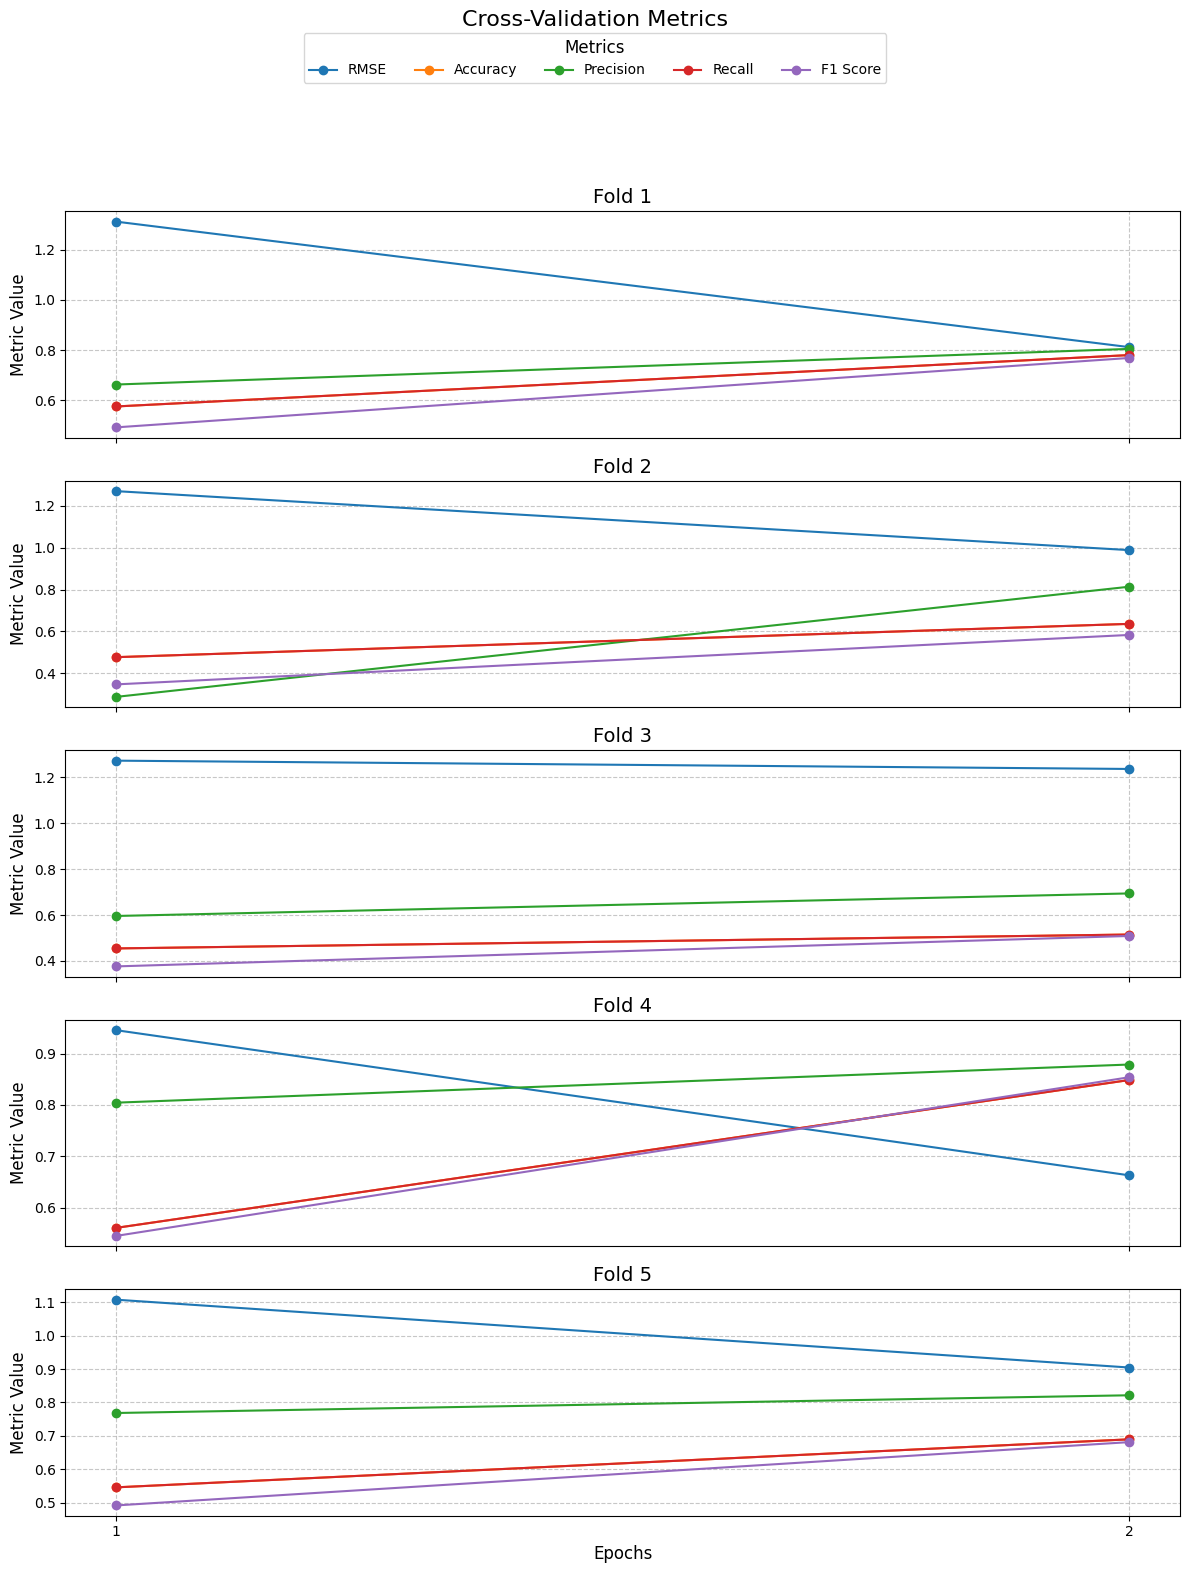

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming `results` holds the fold-wise metrics, where each element is a dictionary.
# Convert the results into a DataFrame for easy plotting
all_results_df = pd.DataFrame(results)

# Define the number of folds
num_folds = 1

# Create subplots for each fold's metrics
fig, axes = plt.subplots(num_folds, 1, figsize=(12, 16), sharex=True)

metrics = ['RMSE', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Loop through each fold and create a subplot for that fold
for fold in range(1, num_folds + 1):
    fold_data = all_results_df[all_results_df['Fold'] == fold]
    ax = axes[fold - 1]

    # Plot each metric for the current fold
    for metric in metrics:
        ax.plot(fold_data['Epoch'], fold_data[metric], marker='o', label=metric)

    # Customize each subplot
    ax.set_title(f'Fold {fold}', fontsize=14)
    ax.set_ylabel('Metric Value', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Ensure x-ticks are displayed on all subplots
    ax.set_xticks(fold_data['Epoch'])  # Ensure we use the epoch values as ticks
    ax.set_xticklabels(fold_data['Epoch'], fontsize=10)  # Display epoch values with rotation

    # Set the xlabel for the last plot only, as the others will inherit it
    if fold == num_folds:
        ax.set_xlabel('Epochs', fontsize=12)

# Add one shared legend for all metrics
lines, labels = axes[-1].get_legend_handles_labels()  # Get handles and labels from the last subplot
fig.legend(
    lines,
    labels,
    loc='upper center',
    title='Metrics',
    fontsize=10,
    title_fontsize=12,
    ncol=len(metrics),
    bbox_to_anchor=(0.5, 1.02)  # Place legend just below the title
)

# Add a title at the top of the entire figure with less space
fig.suptitle('Visualization of all Metrics over multiple folds', fontsize=16, y=1.03)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Fine-tune layout to reduce space

# Show the plot
plt.show()


In [ ]:
# Print the total number of epochs and folds
total_folds = all_results_df['Fold'].nunique()

print(f"\nTotal Folds: {total_folds}")
print(f"Total Epochs: {total_epochs}")

# Now compute the mean for the metrics across all folds and epochs
average_metrics = all_results_df[['RMSE', 'Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=0)

print("\nAverage Metrics Across All Folds and Epochs:")
print(average_metrics)


Total Folds: 5
Total Epochs: 20

Average Metrics Across All Folds and Epochs:
RMSE         1.051311
Accuracy     0.608333
Precision    0.713247
Recall       0.608333
F1 Score     0.564847
dtype: float64


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to predict new image(s)
def predict_new_images(img_paths, model, img_size=(128, 128)):
    # Check if img_paths is a single image or a list of images
    if isinstance(img_paths, str):
        img_paths = [img_paths]  # Convert to a list if it's a single image path

    images = []
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=img_size)  # Resize image to model input size
        img_array = image.img_to_array(img) / 255.0  # Convert image to array and rescale
        images.append(img_array)

    # Convert the list to a numpy array and add batch dimension
    images = np.array(images)

    # Predict the classes
    preds = model.predict(images)
    predicted_labels = np.argmax(preds, axis=1)  # Get predicted class labels for all images

    return predicted_labels, preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


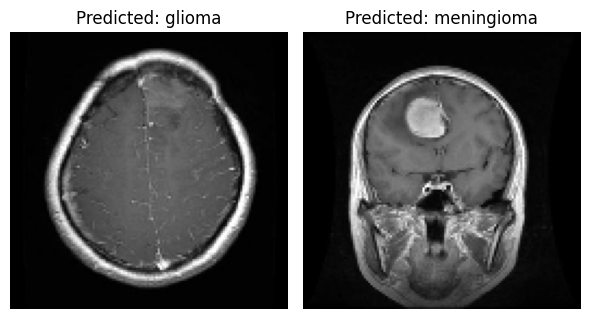

In [ ]:
# Path to the list of new images
new_image_path = [
    '<file_path_new_image_1>',
    '<file_path_new_image_2>'
]  # Update this path to your new image

# Predict on the new images
predicted_labels, preds = predict_new_images(new_image_path, model)  # Call updated function

# Display both images with their predictions
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

for i, img_path in enumerate(new_image_path):
    # Load and display each image
    img = image.load_img(img_path, target_size=(128, 128))
    ax = axes[i]
    ax.imshow(img)
    ax.axis('off')

    # Get predicted class name
    class_name = list(train_gen.class_indices.keys())[predicted_labels[i]]  # Map predicted label index to class name
    ax.set_title(f"Predicted: {class_name}", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
